In [1]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import pandas as pd
np.random.seed(2021)

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Soroush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
f = open("E:\\Media, Docs & Programs\\Uni\\Master's\\A comprehensive analysis of EPR - The evolution of two-way understanding between consumers and producers\\04.Analysis&Conclusion\\Code\\Final analysis\\AllApple.txt")
apple_corpus = f.read()

In [3]:
g = open("E:\\Media, Docs & Programs\\Uni\\Master's\\A comprehensive analysis of EPR - The evolution of two-way understanding between consumers and producers\\04.Analysis&Conclusion\\Code\\Final analysis\\AllSamsung.txt")
samsung_corpus = g.read()

In [4]:
h = open("E:\\Media, Docs & Programs\\Uni\\Master's\\A comprehensive analysis of EPR - The evolution of two-way understanding between consumers and producers\\04.Analysis&Conclusion\\Code\\Final analysis\\Allhuawei.txt")
huawei_corpus =  h.read()

In [5]:
apple_sent_list = nltk.sent_tokenize(apple_corpus)
apple_sent_list[1:2]

['Page 3 Environmental Responsibility at Apple\nPage 4 Climate Change\nPage 11 Renewable Resources\nPage 18 Finite Resources\nPage 23 Toxins\nPage 25 Appendix A\nEnvironmental Health and Safety Policy Statement\nPage 26 Appendix B\nCarbon Assurance and Review Statements\nPage 34 Appendix C\nFacilities Emissions: Scope 1, 2, and 3 Carbon Emissions Disclosure\nEnvironmental Responsibility Report | 2015 Progress Report, Covering FYZO14 2\n\n \nWaSteWater at Our Supplier facility in We strive to leave the world better than we found it, and that means considering\nD0¤99¤¤¤» China, l$ treated and tested everything we do—from the design of our products to the processes we use to make\nfor reuse under the guldenee of Our and recycle them.']

In [6]:
samsung_sent_list = nltk.sent_tokenize(samsung_corpus)
samsung_sent_list[1:2]

['Looking back on our 38-year history of marathon developments, we have achieved\nglobal presence and high reputation.']

In [7]:
huawei_sent_list = nltk.sent_tokenize(huawei_corpus)
huawei_sent_list[1:2]

['Huawei Investment & Holding Co., Ltd.\nEvery year since 2008, Huawei Investment & Holding Co., Ltd.']

In [8]:
apple_df = pd.DataFrame(apple_sent_list)
apple_df = apple_df.rename(columns={0: 'sentence'})
apple_df['company'] = 'apple'
apple_df = apple_df[['company', 'sentence']]
apple_df.head(4)

,company,sentence
0,apple,\nOur micro-hydro project uses the natural dro...
1,apple,Page 3 Environmental Responsibility at Apple\n...
2,apple,Our passion for innovation is also reflected i...
3,apple,Our goal is to make notjust the best products ...


In [9]:
samsung_df = pd.DataFrame(samsung_sent_list)
samsung_df = samsung_df.rename(columns={0: 'sentence'})
samsung_df['company'] = 'samsung'
samsung_df = samsung_df[['company', 'sentence']]
samsung_df.head(4)

,company,sentence
0,samsung,\n \n-;_ _ ‘\n\nContents\nCEO Messa...
1,samsung,Looking back on our 38-year history of maratho...
2,samsung,"Thus, we believe it is high time we share our ..."
3,samsung,We have prepared this report using the G3 Guid...


In [10]:
huawei_df = pd.DataFrame(huawei_sent_list)
huawei_df = huawei_df.rename(columns={0: 'sentence'})
huawei_df['company'] = 'huawei'
huawei_df = huawei_df[['company', 'sentence']]
huawei_df.head(4)

,company,sentence
0,huawei,\nQ Sustainability Report\nQ '*HuAw€.
1,huawei,"Huawei Investment & Holding Co., Ltd.\nEvery y..."
2,huawei,Reporting Guidelines.
3,huawei,"Huawei engaged TUV, an external\n(""Huawei"", ""t..."


In [11]:
samsung_apple_huawei_df = pd.concat([apple_df, samsung_df, huawei_df], axis=0)
samsung_apple_huawei_df

,company,sentence
0,apple,\nOur micro-hydro project uses the natural dro...
1,apple,Page 3 Environmental Responsibility at Apple\n...
2,apple,Our passion for innovation is also reflected i...
3,apple,Our goal is to make notjust the best products ...
4,apple,App|e’s 2015 Environmental Responsibility Repo...
...,...,...
24378,huawei,HUAWEI MAY CHANGE THE INFORMATION ATANYTIME WI...
24379,huawei,HUAWEI INVESTMENT & HOLDING CO-.
24380,huawei,"LTD-\nHuawei Industrial Base\nShenzhen 518129,..."
24381,huawei,Tel: 'I'86`(0)755`287808O8\npost-cunsumercunte...


In [12]:
# Load the regular expression library
import re

# Remove punctuation
samsung_apple_huawei_df['no_punct_sentence'] = samsung_apple_huawei_df['sentence'].map(lambda x: re.sub('[\!?()#&-_@]', '', x))
samsung_apple_huawei_df['no_punct_sentence'] = samsung_apple_huawei_df['no_punct_sentence'].map(lambda x: re.sub('\S*@\S*\s?', '', x)) #emails
samsung_apple_huawei_df['no_punct_sentence'] = samsung_apple_huawei_df['no_punct_sentence'].map(lambda x: re.sub('\s+', ' ', x))  # remove newline chars
# Convert to lowercase
samsung_apple_huawei_df['no_punct_sentence'] = samsung_apple_huawei_df['no_punct_sentence'].map(lambda x: x.lower())
#removing urls
samsung_apple_huawei_df['no_punct_sentence'] = samsung_apple_huawei_df['no_punct_sentence'].map(lambda x: re.sub('https?:\/\/.*[\r\n]*', '', x))
samsung_apple_huawei_df['no_punct_sentence'] = samsung_apple_huawei_df['no_punct_sentence'].map(lambda x: re.sub('www.*[\r\n]*', '', x))
# Print out the first rows of tweets
samsung_apple_huawei_df['no_punct_sentence'].head()

0     ur microhydro project uses the natural drops ...
1    age nvironmental esponsibility at pple age lim...
2    ur passion for innovation is also reflected in...
3    ur goal is to make notjust the best products i...
4    pp|e’s nvironmental esponsibility eport coveri...
Name: no_punct_sentence, dtype: object

In [13]:
%%time

#nltk
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.corpus import wordnet

#removing stop words
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 
                    'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 
                    'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 
                    'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

def sent_to_words(sentences):
    for sentence in sentences:
        # sentence = re.sub('\S*@\S*\s?', '', sentence)  # remove emails
        # sentence = re.sub('\s+', ' ', sentence)  # remove newline chars
        # sentence = re.sub("\'", "", sentence)  # remove single quotes
        # these have been applied in previuos steps

        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = samsung_apple_huawei_df.no_punct_sentence.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
# data_words = remove_stopwords(data_words)
# # print(data_words[:1][0][:30])
print(data_words[:1])

C:\Users\Soroush\AppData\Local\Programs\Python\Python39\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Soroush\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Soroush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Soroush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Soroush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Soroush\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Soroush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already

In [14]:
%%time

# Build the bigram and trigram models
import spacy

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!


Wall time: 1min 43s


In [15]:
%%time

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7, 
                                           iterations=5000,
                                        #    random_state=100,
                                        #    update_every=1,
                                        #    chunksize=10,
                                        #    passes=10,
                                        #    alpha='symmetric',
                                        #    per_word_topics=True
                                            )

print(lda_model.print_topics())

[(0, '0.017*"uawei" + 0.014*"network" + 0.011*"reen" + 0.009*"cost" + 0.008*"reduce" + 0.008*"equipment" + 0.007*"continuously" + 0.007*"ridge" + 0.006*"ommunication" + 0.006*"communication"'), (1, '0.013*"uawei" + 0.011*"improve" + 0.010*"reduce" + 0.010*"help" + 0.010*"solution" + 0.010*"system" + 0.009*"area" + 0.009*"operation" + 0.008*"develop" + 0.008*"customer"'), (2, '0.025*"product" + 0.014*"supplier" + 0.011*"regulation" + 0.011*"environmental" + 0.011*"material" + 0.010*"uawei" + 0.010*"protection" + 0.009*"anagement" + 0.009*"process" + 0.009*"industry"'), (3, '0.032*"employee" + 0.019*"organization" + 0.015*"sustainability" + 0.015*"management" + 0.013*"business" + 0.012*"provide" + 0.011*"service" + 0.010*"stakeholder" + 0.009*"country" + 0.009*"training"'), (4, '0.035*"network" + 0.017*"education" + 0.013*"audit" + 0.011*"incorporate" + 0.010*"cooperation" + 0.010*"provide" + 0.009*"center" + 0.008*"involve" + 0.008*"able" + 0.008*"handle"'), (5, '0.028*"energy" + 0.015*

In [17]:
%%time

import pyLDAvis.gensim_models
import pickle
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str('9_apple_and_samsung_and_huawei'))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str('9_apple_and_samsung_and_huawei') +'.html')
LDAvis_prepared

C:\Users\Soroush\AppData\Local\Programs\Python\Python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


Wall time: 7.18 s


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.046787  0.127947       1        1  20.111939
2      0.147611  0.103266       2        1  17.701402
3      0.105073 -0.236885       3        1  16.959637
5     -0.042156  0.149879       4        1  14.175524
6      0.136072 -0.092906       5        1  13.622628
0     -0.125667  0.062558       6        1  10.723850
4     -0.267721 -0.113859       7        1   6.705020, topic_info=                 Term         Freq        Total Category  logprob  loglift
2925          network  1880.000000  1880.000000  Default  30.0000  30.0000
299          employee  3734.000000  3734.000000  Default  29.0000  29.0000
61             energy  2591.000000  2591.000000  Default  28.0000  28.0000
4479     organization  1571.000000  1571.000000  Default  27.0000  27.0000
680    sustainability  2280.000000  2280.000000  Default  26.0000  26.0000
...               ...          ...          ...      ...      ...      ...
1640          economy   138.123568   245.095937   Topic7  -5.4487   2.1288
152           country   171.487171  1804.299804   Topic7  -5.2324   0.3489
36570           uawei   180.076240  5764.790899   Topic7  -5.1835  -0.7638
2033       contribute   146.032130   578.229821   Topic7  -5.3931   1.3262
295         operation   141.592293  1307.269087   Topic7  -5.4239   0.4796

[472 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
404       3  0.203344       able
404       6  0.069638       able
404       7  0.727024       able
825       1  0.867003     access
825       3  0.059793     access
...     ...       ...        ...
5508      6  0.985946   workshop
305       1  0.087680  worldwide
305       4  0.036533  worldwide
305       5  0.457883  worldwide
305       7  0.416478  worldwide

[993 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 6, 7, 1, 5])

In [19]:
%%time

def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Wall time: 2min 47s


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.4806,"energy, green, uawei, technology, country, dev...","[project, natural, drop, elevation, eschute, h..."
1,1,6.0,0.7153,"supplier, sustainability, management, safety, ...","[pple, age, limate_hange, age, enewable, esour..."
2,2,2.0,0.8585,"product, supplier, regulation, environmental, ...","[passion, innovation, reflect, lean_at, enviro..."
3,3,2.0,0.4763,"product, supplier, regulation, environmental, ...","[goal, notjust, product, world, product, world]"
4,4,6.0,0.3886,"supplier, sustainability, management, safety, ...","[pp, cover, fiscal_year, highlight, progress]"
5,5,5.0,0.3765,"energy, green, uawei, technology, country, dev...","[set, priority, believe, pple, impact, educe, ..."
6,6,3.0,0.5711,"employee, organization, sustainability, manage...",[thrive]
7,7,2.0,0.7959,"product, supplier, regulation, environmental, ...","[ioneer, ofgreener, material, product, process]"
8,8,3.0,0.6842,"employee, organization, sustainability, manage...","[report, detail, approach, priority, highlight..."
9,9,5.0,0.8129,"energy, green, uawei, technology, country, dev...","[starter, data, center, power, entirely, clean..."


In [20]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9343,"uawei, network, reen, cost, reduce, equipment, continuously, ridge, ommunication, communication","[eyond, datum, center, colocate, facility, computing, service, support, demand, cloud, storage, ..."
1,1.0,0.9608,"uawei, improve, reduce, help, solution, system, area, operation, develop, customer","[hese, ln, enya, plan, mangrove, protect, coast, olesls, tland, grassland, help, support, liveli..."
2,2.0,0.9633,"product, supplier, regulation, environmental, material, uawei, protection, anagement, process, i...","[require, company, comply, law, regulation, country, region, uawei, require, supplier, comply, u..."
3,3.0,0.9842,"employee, organization, sustainability, management, business, provide, service, stakeholder, cou...","[cope, ork, pple, request, include, independent, review, follow, ssurance, select, environmental..."
4,4.0,0.9044,"network, education, audit, incorporate, cooperation, provide, center, involve, able, handle","[iber, corporate, facility, represent, less, percent, overall, fiber]"
5,5.0,0.9708,"energy, green, uawei, technology, country, development, power, conservation, solution, etwork","[give, day, percent, renewable, energy, generate, onsite, direct, nation, large, privately, rene..."
6,6.0,0.9642,"supplier, sustainability, management, safety, report, uawei, requirement, performance, standard,...","[resident, anuary, arbon, ssurance, eview_tatement, pple, age, orporate, arbon_ootprint, age, nt..."


In [21]:
samsung_apple_huawei_df = samsung_apple_huawei_df.reset_index()
samsung_apple_huawei_df

,index,company,sentence,no_punct_sentence
0,0,apple,\nOur micro-hydro project uses the natural drops in elevation along the Deschutes River to help ...,ur microhydro project uses the natural drops in elevation along the eschutes iver to help power...
1,1,apple,Page 3 Environmental Responsibility at Apple\nPage 4 Climate Change\nPage 11 Renewable Resources...,age nvironmental esponsibility at pple age limate hange age enewable esources age inite esources...
2,2,apple,Our passion for innovation is also reflected in how we think about\nClean Water Pf°gfem‘ environ...,ur passion for innovation is also reflected in how we think about lean ater f°gfem‘ environmenta...
3,3,apple,"Our goal is to make notjust the best products in the world,\nbut the best products for the world.",ur goal is to make notjust the best products in the world but the best products for the world
4,4,apple,"App|e’s 2015 Environmental Responsibility Report, covering fiscal year 2014, highlights the\npro...",pp|e’s nvironmental esponsibility eport covering fiscal year highlights the progress we’ve made
...,...,...,...,...
58945,24378,huawei,HUAWEI MAY CHANGE THE INFORMATION ATANYTIME WITHOUT NOTICE.,
58946,24379,huawei,HUAWEI INVESTMENT & HOLDING CO-.,
58947,24380,huawei,"LTD-\nHuawei Industrial Base\nShenzhen 518129, RR.China\n® Printed on environmentally friendly p...",uawei ndustrial ase henzhen hina ® rinted on environmentally friendly paper
58948,24381,huawei,"Tel: 'I'86`(0)755`287808O8\npost-cunsumercuntent, acid-free & chlorine free paper.",el `` postcunsumercuntent acidfree chlorine free paper


In [22]:
samsung_apple_huawei_result = pd.concat([samsung_apple_huawei_df, df_dominant_topic], axis=1)
samsung_apple_huawei_result = samsung_apple_huawei_result.drop('index', axis=1)
samsung_apple_huawei_result

,company,sentence,no_punct_sentence,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,apple,\nOur micro-hydro project uses the natural drops in elevation along the Deschutes River to help ...,ur microhydro project uses the natural drops in elevation along the eschutes iver to help power...,0,5.0,0.4806,"energy, green, uawei, technology, country, development, power, conservation, solution, etwork","[project, natural, drop, elevation, eschute, help, power]"
1,apple,Page 3 Environmental Responsibility at Apple\nPage 4 Climate Change\nPage 11 Renewable Resources...,age nvironmental esponsibility at pple age limate hange age enewable esources age inite esources...,1,6.0,0.7153,"supplier, sustainability, management, safety, report, uawei, requirement, performance, standard,...","[pple, age, limate_hange, age, enewable, esource, age, inite, esource, age, oxin, age, ppendix, ..."
2,apple,Our passion for innovation is also reflected in how we think about\nClean Water Pf°gfem‘ environ...,ur passion for innovation is also reflected in how we think about lean ater f°gfem‘ environmenta...,2,2.0,0.8585,"product, supplier, regulation, environmental, material, uawei, protection, anagement, process, i...","[passion, innovation, reflect, lean_at, environmental, responsibility]"
3,apple,"Our goal is to make notjust the best products in the world,\nbut the best products for the world.",ur goal is to make notjust the best products in the world but the best products for the world,3,2.0,0.4763,"product, supplier, regulation, environmental, material, uawei, protection, anagement, process, i...","[goal, notjust, product, world, product, world]"
4,apple,"App|e’s 2015 Environmental Responsibility Report, covering fiscal year 2014, highlights the\npro...",pp|e’s nvironmental esponsibility eport covering fiscal year highlights the progress we’ve made,4,6.0,0.3886,"supplier, sustainability, management, safety, report, uawei, requirement, performance, standard,...","[pp, cover, fiscal_year, highlight, progress]"
...,...,...,...,...,...,...,...,...
58945,huawei,HUAWEI MAY CHANGE THE INFORMATION ATANYTIME WITHOUT NOTICE.,,58945,0.0,0.1429,"uawei, network, reen, cost, reduce, equipment, continuously, ridge, ommunication, communication",[]
58946,huawei,HUAWEI INVESTMENT & HOLDING CO-.,,58946,0.0,0.1429,"uawei, network, reen, cost, reduce, equipment, continuously, ridge, ommunication, communication",[]
58947,huawei,"LTD-\nHuawei Industrial Base\nShenzhen 518129, RR.China\n® Printed on environmentally friendly p...",uawei ndustrial ase henzhen hina ® rinted on environmentally friendly paper,58947,0.0,0.7137,"uawei, network, reen, cost, reduce, equipment, continuously, ridge, ommunication, communication","[hina, rinte]"
58948,huawei,"Tel: 'I'86`(0)755`287808O8\npost-cunsumercuntent, acid-free & chlorine free paper.",el `` postcunsumercuntent acidfree chlorine free paper,58948,2.0,0.7141,"product, supplier, regulation, environmental, material, uawei, protection, anagement, process, i...","[free, paper]"


In [68]:
# samsung_apple_huawei_result.to_csv('ssamsung_apple_huawei_report_topics_together.csv')
# samsung_apple_huawei_result.head(4)

In [24]:
topic_counts = samsung_apple_huawei_result.groupby('Dominant_Topic')['no_punct_sentence'].count()
topic_counts = pd.DataFrame(topic_counts).reset_index()
topic_counts

,Dominant_Topic,no_punct_sentence
0,0.0,22195
1,1.0,9121
2,2.0,7609
3,3.0,6762
4,4.0,2688
5,5.0,5340
6,6.0,5235


Text(73.125, 0.5, 'Number of sentences')

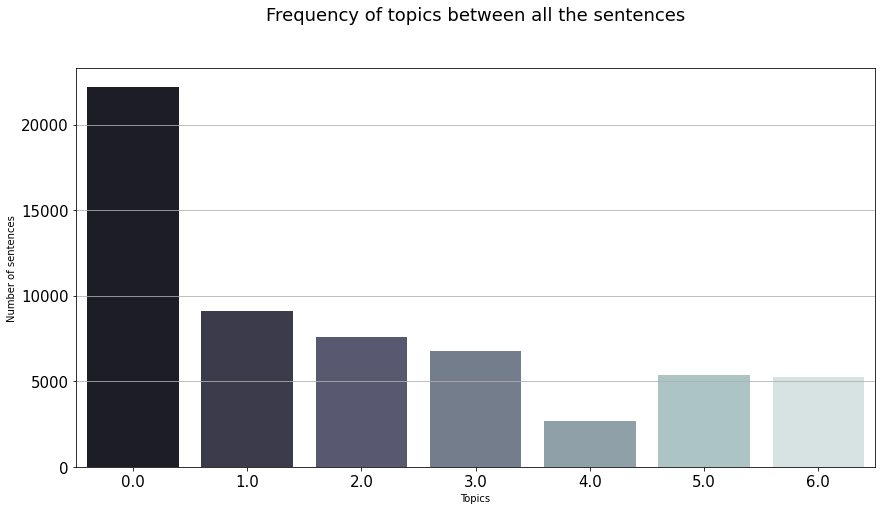

In [27]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (12,7))
ax.tick_params(axis='both', labelsize=15)

# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax.set_title('Frequency of topics between all the sentences\n\n', size = 18)

plt.tight_layout()
ax.grid(axis='y')
# sns.barplot(data=df_freq, y='Keywords', x='Frequency', color='#4472c4')
sns.barplot(data=topic_counts, x='Dominant_Topic', y='no_punct_sentence', palette='bone')
plt.xlabel('Topics')
plt.ylabel('Number of sentences')

In [76]:
# samsung_apple_huawei_result['sentence'].nunique()

51305

In [28]:
topic_counts_company = pd.DataFrame(samsung_apple_huawei_result.groupby(['Dominant_Topic', 'company'])['sentence'].count()).reset_index()
topic_counts_company

,Dominant_Topic,company,sentence
0,0.0,apple,3513
1,0.0,huawei,10261
2,0.0,samsung,8421
3,1.0,apple,1612
4,1.0,huawei,4120
5,1.0,samsung,3389
6,2.0,apple,1915
7,2.0,huawei,2788
8,2.0,samsung,2906
9,3.0,apple,725


Text(73.125, 0.5, 'Frequency')

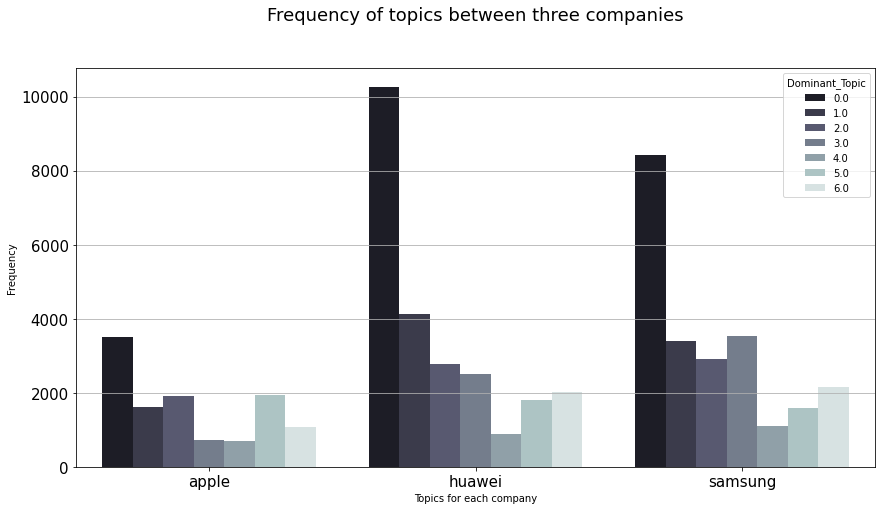

In [30]:
fig, ax = plt.subplots(figsize = (12,7))
ax.tick_params(axis='both', labelsize=15)

# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax.set_title('Frequency of topics between three companies\n\n', size = 18)

plt.tight_layout()
ax.grid(axis='y')

# sns.barplot(data=df_freq, y='Keywords', x='Frequency', color='#4472c4')
sns.barplot(data=pd.DataFrame(topic_counts_company).reset_index(), 
                        y='sentence', x='company', hue='Dominant_Topic' , color='blue', palette='bone')
plt.xlabel('Topics for each company')
plt.ylabel('Frequency')

In [31]:
app = topic_counts_company[topic_counts_company['company']=='apple']['sentence']/topic_counts_company[topic_counts_company['company']=='apple']['sentence'].sum()*100
huw = topic_counts_company[topic_counts_company['company']=='huawei']['sentence']/topic_counts_company[topic_counts_company['company']=='huawei']['sentence'].sum()*100
sam = topic_counts_company[topic_counts_company['company']=='samsung']['sentence']/topic_counts_company[topic_counts_company['company']=='samsung']['sentence'].sum()*100

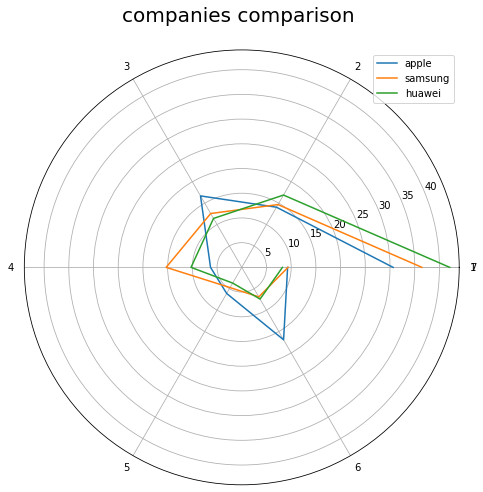

In [34]:
import numpy as np
import matplotlib.pyplot as plt

apple = topic_counts_company[topic_counts_company['company'] == 'apple']
samsung = topic_counts_company[topic_counts_company['company'] == 'samsung']
samsung = samsung.reset_index()
samsung = samsung.drop('index', axis=1)
apple = apple.reset_index()
apple = apple.drop('index', axis=1)

categories = [1, 2, 3, 4, 5, 6, 7]
apple = app
samsung = sam
huawei = huw

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(apple))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, apple, label='apple')
plt.plot(label_loc, samsung, label='samsung')
plt.plot(label_loc, huawei, label='huawei')
plt.title('companies comparison \n', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()